A. Jumlah total penumpang: 891

B. Jumlah penumpang yang selamat dan tidak selamat:
Survived
Tidak Selamat    549
Selamat          342
Name: count, dtype: int64


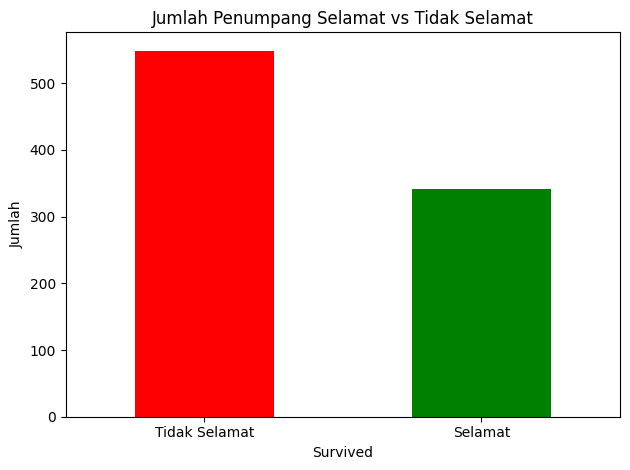


C. Rata-rata umur penumpang: 29.70 tahun

Penumpang termuda:
                                Name   Age   Sex  Survived
803  Thomas, Master. Assad Alexander  0.42  male         1

Penumpang tertua:
                                     Name   Age   Sex  Survived
630  Barkworth, Mr. Algernon Henry Wilson  80.0  male         1

D. Jumlah penumpang berdasarkan jenis kelamin:
Sex
male      577
female    314
Name: count, dtype: int64
Jenis kelamin yang lebih banyak: Laki-laki


C:\Users\ACER\AppData\Local\Temp\ipykernel_12696\3676072107.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='Set2')


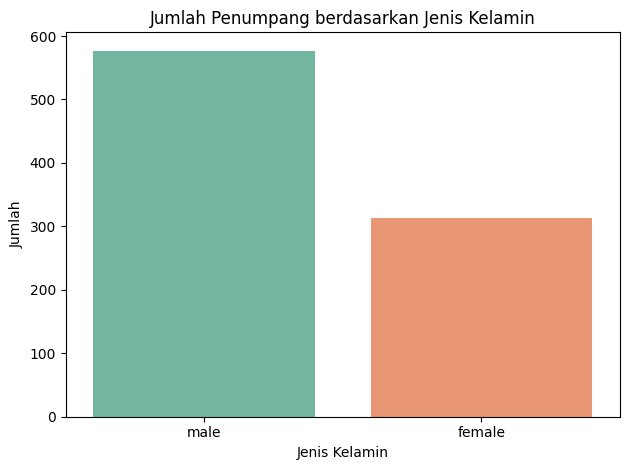


E. Jumlah penumpang berdasarkan kelas:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64
Persentase penumpang di kelas 1: 24.24%


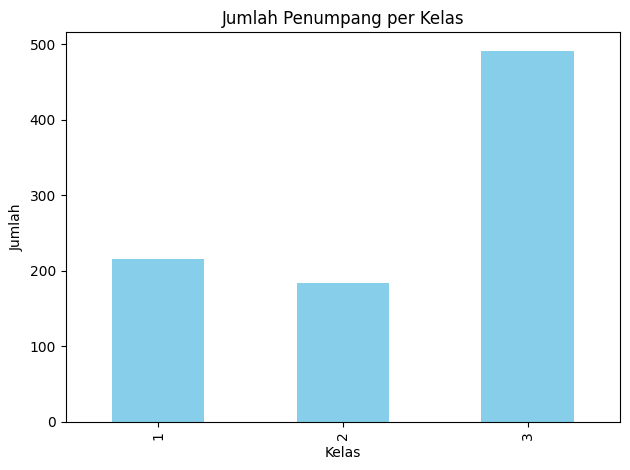

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
# Baca data dari file train.csv
df = pd.read_csv("C:/Users/ACER/Downloads/Titanic-Dataset.csv")

#1
# a. Jumlah total penumpang
jumlah_penumpang = len(df)
print(f"A. Jumlah total penumpang: {jumlah_penumpang}")

# b. Jumlah penumpang yang selamat dan tidak selamat
jumlah_selamat = df['Survived'].value_counts()
print("\nB. Jumlah penumpang yang selamat dan tidak selamat:")
print(jumlah_selamat.rename(index={0: 'Tidak Selamat', 1: 'Selamat'}))

# Grafik batang
jumlah_selamat.plot(kind='bar', color=['red', 'green'])
plt.title('Jumlah Penumpang Selamat vs Tidak Selamat')
plt.xticks(ticks=[0, 1], labels=['Tidak Selamat', 'Selamat'], rotation=0)
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

# c. Rata-rata umur, penumpang termuda dan tertua
rata_umur = df['Age'].mean()
penumpang_termuda = df[df['Age'] == df['Age'].min()]
penumpang_tertua = df[df['Age'] == df['Age'].max()]

print(f"\nC. Rata-rata umur penumpang: {rata_umur:.2f} tahun")
print("\nPenumpang termuda:")
print(penumpang_termuda[['Name', 'Age', 'Sex', 'Survived']])

print("\nPenumpang tertua:")
print(penumpang_tertua[['Name', 'Age', 'Sex', 'Survived']])

# d. Jumlah penumpang berdasarkan jenis kelamin
jumlah_gender = df['Sex'].value_counts()
print("\nD. Jumlah penumpang berdasarkan jenis kelamin:")
print(jumlah_gender)

lebih_banyak = "Laki-laki" if jumlah_gender['male'] > jumlah_gender['female'] else "Perempuan"
print(f"Jenis kelamin yang lebih banyak: {lebih_banyak}")

# Visualisasi jenis kelamin
sns.countplot(x='Sex', data=df, palette='Set2')
plt.title('Jumlah Penumpang berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

# e. Jumlah penumpang berdasarkan kelas & persentase kelas 1
jumlah_kelas = df['Pclass'].value_counts().sort_index()
persen_kelas_1 = (jumlah_kelas[1] / jumlah_penumpang) * 100

print("\nE. Jumlah penumpang berdasarkan kelas:")
print(jumlah_kelas)
print(f"Persentase penumpang di kelas 1: {persen_kelas_1:.2f}%")

# Visualisasi kelas penumpang
jumlah_kelas.plot(kind='bar', color='skyblue')
plt.title('Jumlah Penumpang per Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


2c. Ya, terdapat outlier pada data Titanic, khususnya di kolom Fare dan Age. Outlier adalah nilai yang jauh dari mayoritas data lainnya.
Contoh: jika kebanyakan umur penumpang antara 10–50 tahun, tapi ada yang 0.42 atau 80 tahun, itu bisa dianggap outlier.

2d. Jika outlier sangat mempengaruhi model (misalnya model sensitif terhadap nilai ekstrem seperti regresi), maka perlu diatasi

Kalau model yang digunakan tahan terhadap outlier (misalnya Decision Tree, Random Forest), bisa dibiarkan

Cara Mengatasi Outlier:
1. Menghapus outlier:
2. Winsorizing (batasi nilai ekstrem ke batas tertentu):
Mengganti nilai di atas/bawah ambang batas dengan nilai kuartil
3. Transformasi Data:

A. Cek Missing Values:
Series([], dtype: int64)

B. Penanganan Missing Value:
Missing values setelah ditangani:
Series([], dtype: int64)

C. Pendeteksian Outlier pada 'Age' dan 'Fare':
Outlier pada kolom Age: 66 baris
Outlier pada kolom Fare: 116 baris


C:\Users\ACER\AppData\Local\Temp\ipykernel_12696\1589346393.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_12696\1589346393.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

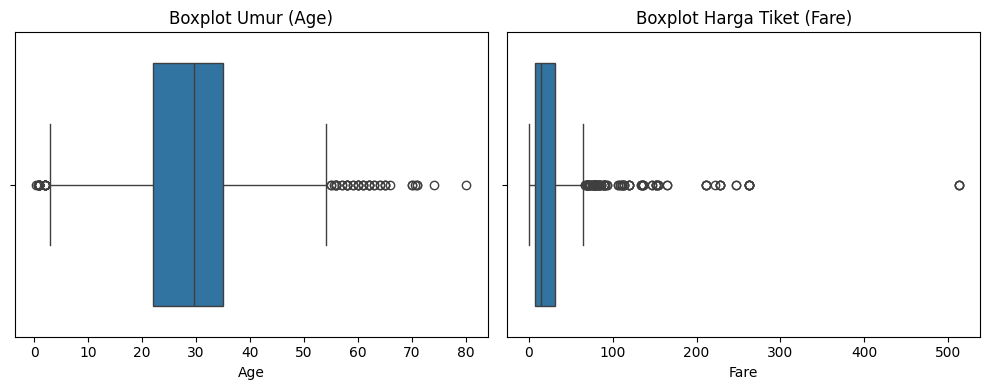


D. Penanganan Outlier:
Penanganan tergantung konteks. Misalnya 'Fare' sangat mahal bisa masuk akal untuk kelas 1.
Jumlah baris setelah menghapus outlier Fare > 99 percentile: 882

E. Standarisasi Data:
        Age      Fare
0 -0.592481 -0.502445
1  0.638789  0.786845
2 -0.284663 -0.488854
3  0.407926  0.420730
4  0.407926 -0.486337


In [ ]:
# 2
# a. Apakah terdapat missing value?
print("A. Cek Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# b. Jika ya, apa yang dilakukan?
print("\nB. Penanganan Missing Value:")

# Contoh penanganan
# - Untuk kolom 'Age' bisa diisi dengan rata-rata
# - Untuk kolom 'Embarked' bisa diisi dengan modus
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].mean(), inplace=True)
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
if 'Cabin' in df.columns:
    df['Cabin'].fillna("Unknown", inplace=True)

print("Missing values setelah ditangani:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# c. Apakah terdapat outlier? Apa itu outlier?
print("\nC. Pendeteksian Outlier pada 'Age' dan 'Fare':")

def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers

outliers_age = detect_outliers('Age')
outliers_fare = detect_outliers('Fare')

print(f"Outlier pada kolom Age: {len(outliers_age)} baris")
print(f"Outlier pada kolom Fare: {len(outliers_fare)} baris")

# Penjelasan: Outlier adalah data yang jauh dari nilai mayoritas (menyimpang)

# Visualisasi boxplot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x=df['Age'])
plt.title("Boxplot Umur (Age)")

plt.subplot(1,2,2)
sns.boxplot(x=df['Fare'])
plt.title("Boxplot Harga Tiket (Fare)")
plt.tight_layout()
plt.show()

# d. Apakah outlier perlu diatasi?
print("\nD. Penanganan Outlier:")
print("Penanganan tergantung konteks. Misalnya 'Fare' sangat mahal bisa masuk akal untuk kelas 1.")

# Contoh mengatasi outlier: trimming (hapus)
df_clean = df[~((df['Fare'] > df['Fare'].quantile(0.99)))]  # menghapus outlier ekstrem atas
print(f"Jumlah baris setelah menghapus outlier Fare > 99 percentile: {len(df_clean)}")

# e. Apakah perlu transformasi / scaling?
print("\nE. Standarisasi Data:")
numeric_cols = ['Age', 'Fare']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df_scaled[numeric_cols].head())



3a. Pembagian data dilakukan agar kita bisa melatih model dengan data training, lalu mengujinya pada data testing untuk melihat apakah model mampu memprediksi data baru dengan baik.
Jika kita hanya melatih dan menguji di data yang sama, kita tidak tahu apakah model benar-benar pintar atau hanya menghafal data (overfitting).

3b. 80% untuk training
20% untuk testing

Alasannya: 80% sudah cukup untuk belajar pola dari data, dan 20% cukup untuk mengevaluasi kinerja model.

3c. Berikut adalah 3 model dan penjelasannya:
1. Logistic Regression
- Model linier untuk klasifikasi biner
- Menghitung probabilitas dan membuat keputusan berdasarkan ambang batas (biasanya 0.5)

2. Decision Tree
- Membagi data berdasarkan fitur terbaik (seperti pohon bercabang)
- Mudah dipahami, cocok untuk data kategorikal dan numerik

3. Random Forest
Gabungan dari banyak decision tree
Mengurangi overfitting dan meningkatkan akurasi

3d.- Accuracy: Persentase prediksi yang benar dari seluruh data
- Precision: Akurasi model ketika memprediksi “selamat”
- Recall: Kemampuan model dalam menemukan semua penumpang yang “selamat”
- F1-Score: Kombinasi dari precision dan recall — bagus kalau seimbang

3e. Random Forest paling bagus, karena:
- Lebih stabil (menghindari overfitting)
- Mampu menangani fitur numerik dan kategorikal dengan baik
- Kombinasi banyak model membuat prediksi lebih akurat



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# 3
# Pra-pemrosesan data
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode variabel kategorikal
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])  # female:0, male:1
df['Embarked'] = label.fit_transform(df['Embarked'])

# Fitur dan target
X = df.drop("Survived", axis=1)
y = df['Survived']

# b. Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# c. Inisialisasi model
model_logreg = LogisticRegression()
model_tree = DecisionTreeClassifier(random_state=42)
model_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Training model
model_logreg.fit(X_train, y_train)
model_tree.fit(X_train, y_train)
model_forest.fit(X_train, y_train)

# d. Evaluasi model
models = {
    "Logistic Regression": model_logreg,
    "Decision Tree": model_tree,
    "Random Forest": model_forest
}

for name, model in models.items():
    print(f"\nModel: {name}")
    y_pred = model.predict(X_test)
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


C:\Users\ACER\AppData\Local\Temp\ipykernel_12696\2819124106.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_12696\2819124106.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa


Model: Logistic Regression
Akurasi: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Model: Decision Tree
Akurasi: 0.7653631284916201
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       105
           1       0.71      0.74      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179


Model: Random Forest
Akurasi: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.72      0.73        74

    accuracy              

In [ ]:
from sklearn.metrics import classification_report
# 4a
# Misal kamu sudah punya prediksi dari model terbaik
y_pred = model_forest.predict(X_test)

# Cetak classification report
report = classification_report(y_test, y_pred, target_names=["Tidak Selamat", "Selamat"])
print(report)


               precision    recall  f1-score   support

Tidak Selamat       0.81      0.83      0.82       105
      Selamat       0.75      0.72      0.73        74

     accuracy                           0.78       179
    macro avg       0.78      0.77      0.77       179
 weighted avg       0.78      0.78      0.78       179



In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[87 18]
 [21 53]]
